In [2]:
import os
import numpy as np
from scipy.io.wavfile import read as wavread
import matplotlib.pyplot as plt
from IPython.display import Audio, display

import warnings
warnings.filterwarnings("ignore")

import torch
from torch.utils.data import Dataset, DataLoader

import random
random.seed(42)
torch.manual_seed(42)
np.random.seed(42)

from torchvision import datasets, models, transforms
import torchaudio

import soundfile as sf

In [3]:
from dataset import load_CleanNoisyPairDataset

clean_dir = './training_set/clean'
noisy_dir = './training_set/noisy'

dataset, dataloader = load_CleanNoisyPairDataset(clean_dir, noisy_dir)
print(f"Dataset size: {len(dataset)}")

Dataset size: 11572


Single item - Clean waveform shape: torch.Size([1, 48000])
Single item - Noisy waveform shape: torch.Size([1, 48000])


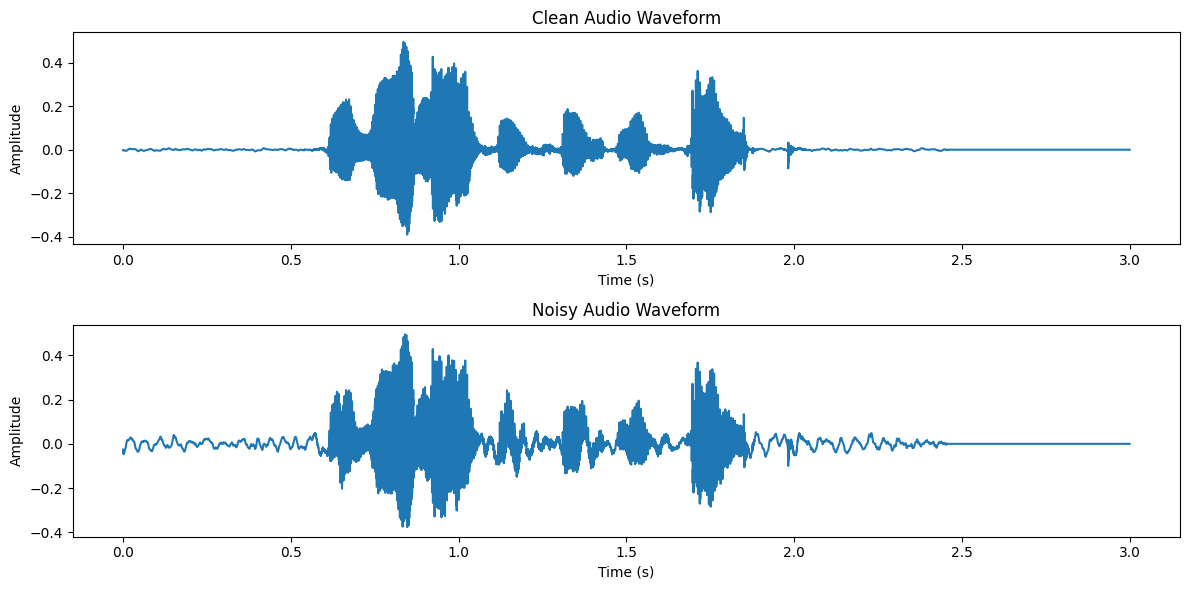

Clean Audio:


Noisy Audio:


In [4]:
from util import visualize_and_play_audio_pair

# Accessing a single item from the dataset
rand = random.randint(0, len(dataset))
clean_wave, noisy_wave = dataset[rand]

print(f"Single item - Clean waveform shape: {clean_wave.shape}")
print(f"Single item - Noisy waveform shape: {noisy_wave.shape}")

visualize_and_play_audio_pair(clean_wave, noisy_wave, sample_rate=16000)

In [5]:
from train import train_with_val

clean_dir = './training_set/clean'
noisy_dir = './training_set/noisy'


train_with_val(clean_dir=clean_dir, noisy_dir=noisy_dir, batch_size=8, train_split_size=0.9, log_dir="./exp", exp_path="finetuned", ckpt_iter_arg="pretrained",
      learning_rate=1e-5, ell_p=1, ell_p_lambda=1, n_iters=2000, stft_lambda= 1, iters_per_valid=5, iters_per_ckpt=500)

KeyboardInterrupt: 

Dataset size: 824
Sample collected: 71
CleanUNet Parameters: 46.071937M;  


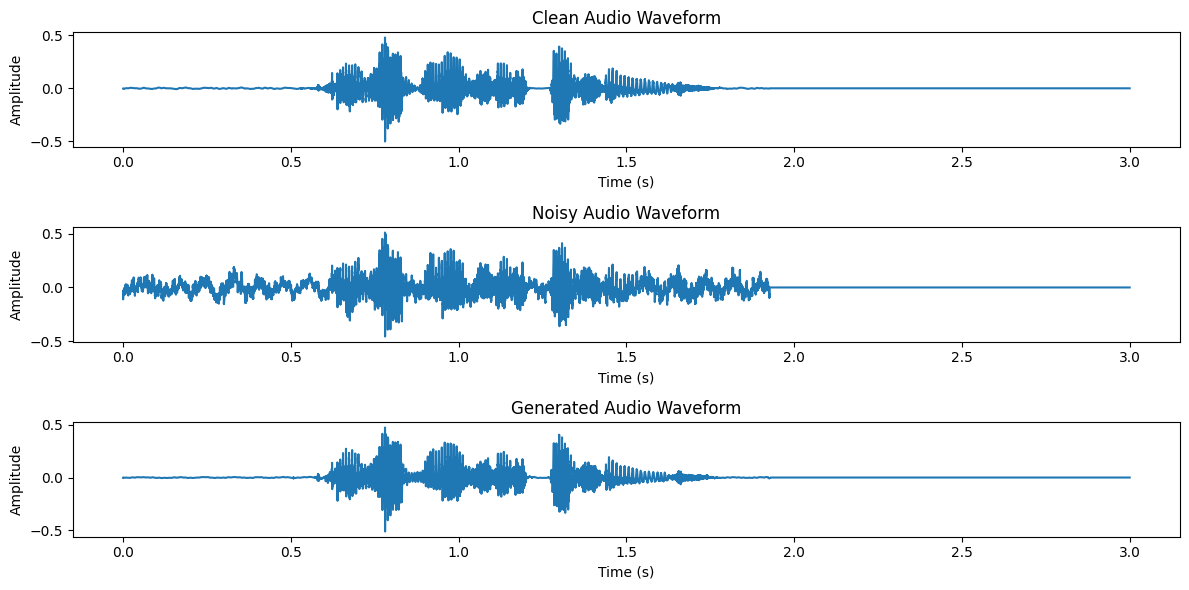

Clean Audio:


Noisy Audio:


Generated Audio: 


In [ ]:
from util import visualize_and_play_audio_triplet
import numpy as np
from denoise import denoise_single_sample
from dataset import load_CleanNoisyPairDataset

clean_dir = './test_set/clean'
noisy_dir = './test_set/noisy'

test_set, _ = load_CleanNoisyPairDataset(clean_dir, noisy_dir)
print(f"Dataset size: {len(test_set)}")
# Get a random sample
index = np.random.randint(0, len(test_set))
print(f'Sample collected: {index}')
clean_waveform, noisy_waveform = test_set[index]

clean_waveform, generated_waveform = denoise_single_sample(clean_waveform, noisy_waveform, model_path="./exp/finetuned/checkpoint/best_model.pkl", sample_rate=16000)

visualize_and_play_audio_triplet(clean_waveform, noisy_waveform, generated_waveform, sample_rate=16000)

In [1]:
from denoise import denoise

clean_dir = './test_set/clean'
noisy_dir = './test_set/noisy'

denoise(clean_dir=clean_dir, noisy_dir=noisy_dir, batch_size=8, sample_rate=16000,
        output_directory="./exp", log_dir="./exp", exp_path="finetuned", ckpt_iter='max')

exp_path: finetuned
Data loaded
CleanUNet Parameters: 46.071937M;  
speech_directory:  ./exp\finetuned\speech\2k


100%|██████████| 103/103 [00:14<00:00,  7.35it/s]


Number of generated audio 824
Evaluation Results:
PESQ: 3.0083
STOI: 95.53
SNR: 19.1131 dB


([array([-0.00128485, -0.00202088, -0.00185345, ...,  0.        ,
          0.        ,  0.        ], dtype=float32),
  array([-5.0493378e-05, -3.9107905e-05, -7.7664285e-05, ...,
         -2.0947995e-02, -8.2586497e-02, -1.3585092e-01], dtype=float32),
  array([-0.00879975, -0.0143186 , -0.01289718, ..., -0.0009498 ,
         -0.00120543, -0.00151987], dtype=float32),
  array([0.00038429, 0.00102696, 0.00080003, ..., 0.        , 0.        ,
         0.        ], dtype=float32),
  array([0.00810428, 0.01329773, 0.01220887, ..., 0.        , 0.        ,
         0.        ], dtype=float32),
  array([-0.00073139, -0.00135266, -0.00129998, ...,  0.        ,
          0.        ,  0.        ], dtype=float32),
  array([-0.00160715, -0.00243305, -0.00186876, ..., -0.04903093,
         -0.06138577, -0.0597958 ], dtype=float32),
  array([0.00111114, 0.00236589, 0.0034334 , ..., 0.        , 0.        ,
         0.        ], dtype=float32),
  array([-0.00425006, -0.0069162 , -0.00633081, ...,  0.